In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("titanic_dataset (1).csv")

In [3]:
data.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


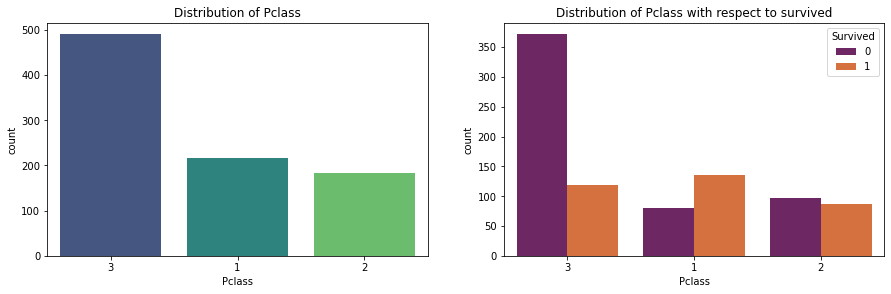

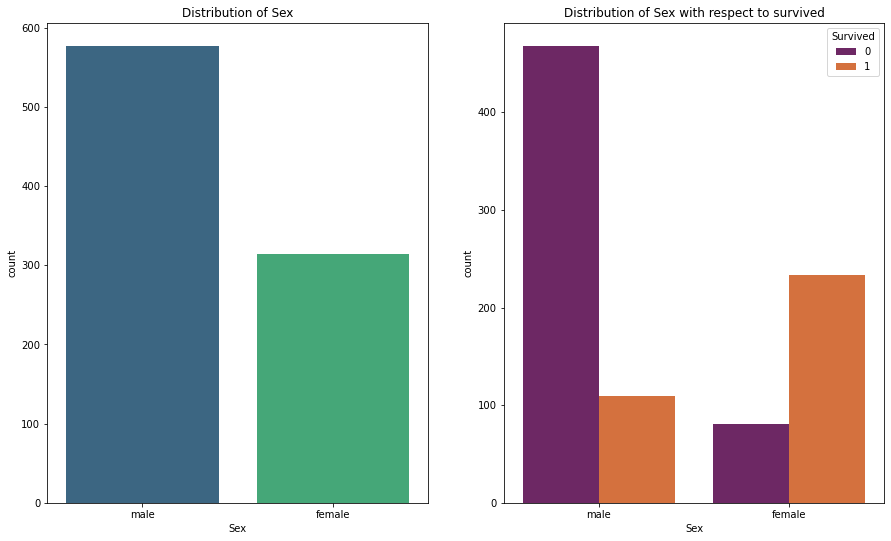

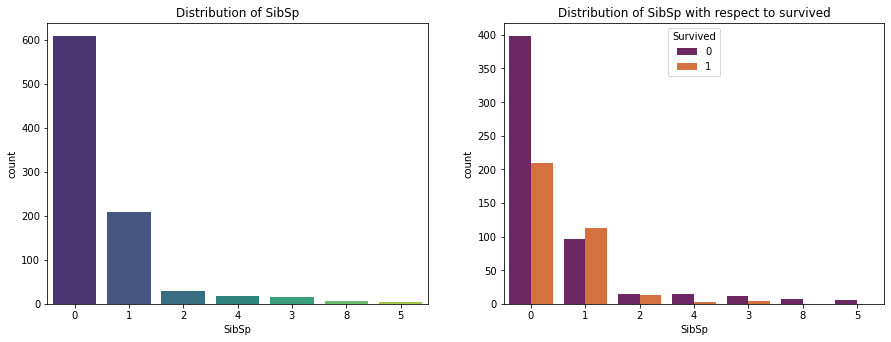

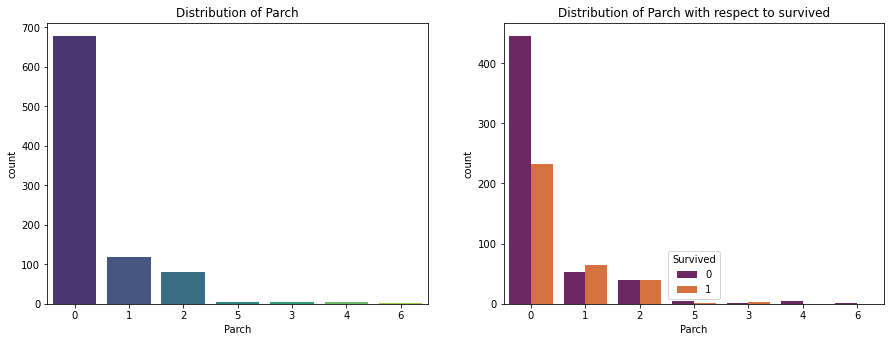

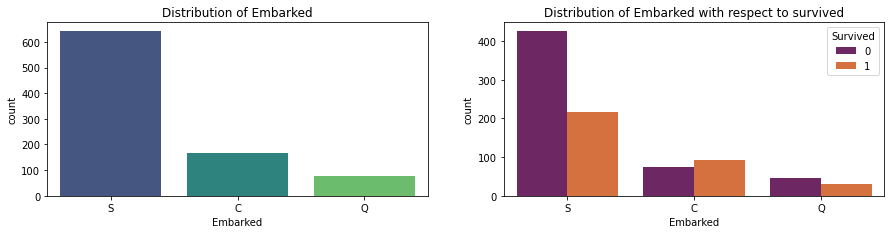

In [5]:
columns =["Pclass","Sex","SibSp","Parch","Embarked"]

for i in columns:
    plt.figure(figsize=(15,30))
    plt.subplot(len(i), 2, 1)
    sns.countplot(x=data[i],order=data[i].value_counts().index,palette="viridis")
    plt.title('Distribution of {}'.format(i))
    
    plt.subplot(len(i), 2, 2)
    sns.countplot(x=data[i],order=data[i].value_counts().index,hue=data["Survived"],palette="inferno")
    plt.title('Distribution of {} with respect to survived'.format(i))
    plt.show()

In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


PREPROCESSING

In [7]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
data["Age"]=data["Age"].fillna(data["Age"].median())

In [9]:
data["Embarked"]=data["Embarked"].fillna(data["Embarked"].mode()[0])

since the cabin column has large number of null values we can drop that column 

In [10]:
data=data.drop("Cabin",axis=1)

In [11]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

###### check and handle outliers in the dataset

In [12]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

Text(0.5, 1.0, 'Boxplot of fare')

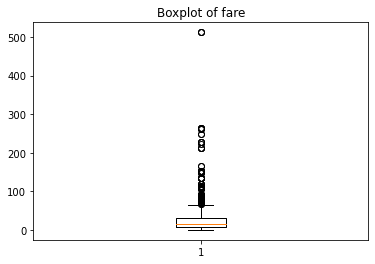

In [13]:
plt.boxplot(data["Fare"])
plt.title("Boxplot of fare")

In [14]:
Q1=np.percentile(data["Fare"],25,interpolation="midpoint")
Q2=np.percentile(data["Fare"],50,interpolation="midpoint")
Q3=np.percentile(data["Fare"],75,interpolation="midpoint")
print("Q1:",Q1)
print("Q2:",Q2)
print("Q3:",Q3)


Q1: 7.9104
Q2: 14.4542
Q3: 31.0


In [15]:
IQR=Q3-Q1
print("IQR:",IQR)

IQR: 23.0896


In [16]:
low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR
print("low_limit:",low_limit)
print("upper_limit:",up_limit)

low_limit: -26.724
upper_limit: 65.6344


In [17]:
outlier=[]
for x in data["Fare"]:
    if((x<low_limit) or (x>up_limit)):
        outlier.append(x)

In [18]:
print("outlier values are:",outlier)

outlier values are: [71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 263.0, 77.2875, 247.5208, 73.5, 77.2875, 79.2, 66.6, 69.55, 69.55, 146.5208, 69.55, 113.275, 76.2917, 90.0, 83.475, 90.0, 79.2, 86.5, 512.3292, 79.65, 153.4625, 135.6333, 77.9583, 78.85, 91.0792, 151.55, 247.5208, 151.55, 110.8833, 108.9, 83.1583, 262.375, 164.8667, 134.5, 69.55, 135.6333, 153.4625, 133.65, 66.6, 134.5, 263.0, 75.25, 69.3, 135.6333, 82.1708, 211.5, 227.525, 73.5, 120.0, 113.275, 90.0, 120.0, 263.0, 81.8583, 89.1042, 91.0792, 90.0, 78.2667, 151.55, 86.5, 108.9, 93.5, 221.7792, 106.425, 71.0, 106.425, 110.8833, 227.525, 79.65, 110.8833, 79.65, 79.2, 78.2667, 153.4625, 77.9583, 69.3, 76.7292, 73.5, 113.275, 133.65, 73.5, 512.3292, 76.7292, 211.3375, 110.8833, 227.525, 151.55, 227.525, 211.3375, 512.3292, 78.85, 262.375, 71.0, 86.5, 120.0, 77.9583, 211.3375, 79.2, 69.55, 120.0, 93.5, 80.0, 83.1583, 69.55, 89.1042, 164.8667, 69.55, 83.1583]


In [19]:
data["Fare"]=np.where(data["Fare"]>up_limit,up_limit,np.where(data["Fare"]<low_limit,low_limit,data["Fare"]))

Text(0.5, 1.0, 'Boxplot of fare after removing outliers')

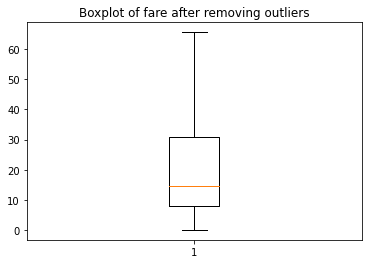

In [20]:
plt.boxplot(data["Fare"])
plt.title("Boxplot of fare after removing outliers")

Text(0.5, 1.0, 'Boxplot of SibSp')

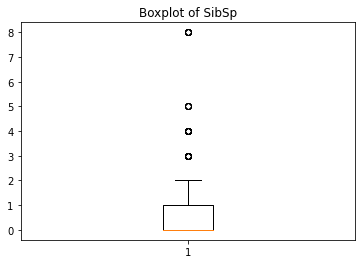

In [21]:
plt.boxplot(data["SibSp"])
plt.title("Boxplot of SibSp")

In [22]:
Q1=np.percentile(data["SibSp"],25,interpolation="midpoint")
Q2=np.percentile(data["SibSp"],50,interpolation="midpoint")
Q3=np.percentile(data["SibSp"],75,interpolation="midpoint")
print("Q1:",Q1)
print("Q2:",Q2)
print("Q3:",Q3)

Q1: 0.0
Q2: 0.0
Q3: 1.0


In [23]:
IQR=Q3-Q1
print("IQR:",IQR)
low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR
print("low_limit:",low_limit)
print("upper_limit:",up_limit)

IQR: 1.0
low_limit: -1.5
upper_limit: 2.5


In [24]:
Outlier=[]
for x in data["SibSp"]:
    if((x<low_limit) or (x>up_limit)):
        Outlier.append(x)
print("outliers are:",Outlier)

outliers are: [3, 4, 3, 3, 4, 5, 3, 4, 5, 3, 3, 4, 8, 4, 4, 3, 8, 4, 8, 3, 4, 4, 4, 4, 8, 3, 3, 5, 3, 5, 3, 4, 4, 3, 3, 5, 4, 3, 4, 8, 4, 3, 4, 8, 4, 8]


In [25]:
data["SibSp"]=np.where(data["SibSp"]>up_limit,up_limit,np.where(data["SibSp"]<low_limit,low_limit,data["SibSp"]))

Text(0.5, 1.0, 'Boxplot of Sibsp after removing outliers')

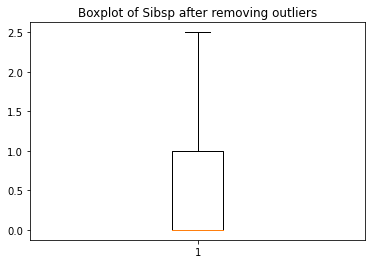

In [26]:
plt.boxplot(data["SibSp"])
plt.title("Boxplot of Sibsp after removing outliers")

Text(0.5, 1.0, 'Boxplot of age')

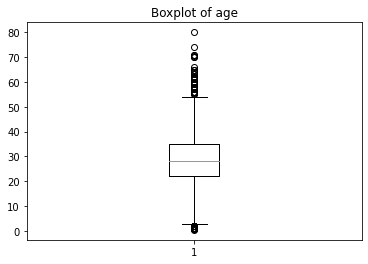

In [27]:
plt.boxplot(data["Age"])
plt.title("Boxplot of age")

Text(0.5, 1.0, 'Box plot of Age')

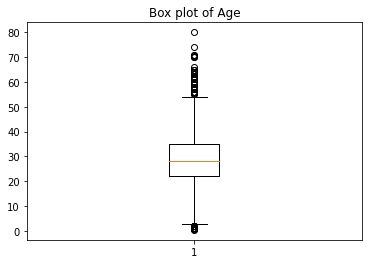

In [28]:
plt.boxplot(data["Age"])
plt.title("Box plot of Age")

In [29]:
Q1=np.percentile(data["Age"],25,interpolation="midpoint")
Q2=np.percentile(data["Age"],50,interpolation="midpoint")
Q3=np.percentile(data["Age"],75,interpolation="midpoint")
print("Q1:",Q1)
print("Q2:",Q2)
print("Q3:",Q3)

Q1: 22.0
Q2: 28.0
Q3: 35.0


In [30]:
IQR=Q3-Q1
print("IQR:",IQR)
low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR
print("low_limit:",low_limit)
print("upper_limit:",up_limit)

IQR: 13.0
low_limit: 2.5
upper_limit: 54.5


In [31]:
Outlier=[]
for x in data["SibSp"]:
    if((x<low_limit) or (x>up_limit)):
        Outlier.append(x)
print("outliers are:",Outlier)

outliers are: [1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 2.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 2.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 2.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 2.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 2.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 

In [32]:
data["Age"]=np.where(data["Age"]>up_limit,up_limit,np.where(data["Age"]<low_limit,low_limit,data["Age"]))

Text(0.5, 1.0, 'Boxplot of age aftre removing outliers')

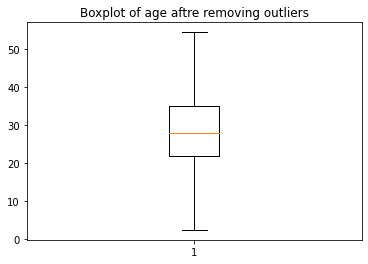

In [33]:
plt.boxplot(data["Age"])
plt.title("Boxplot of age aftre removing outliers")

In [34]:
data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             65
SibSp            4
Parch            7
Ticket         681
Fare           204
Embarked         3
dtype: int64

In [35]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp          float64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [36]:
data["Family"]=data["SibSp"]+data["Parch"]

The Name and Ticket columns have too much unique values so we dropped these two columns

In [37]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Family'],
      dtype='object')

In [38]:
data=data.drop(["Parch","SibSp","Name","Ticket"],axis=1)

In [39]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked',
       'Family'],
      dtype='object')

In [40]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
Fare           float64
Embarked        object
Family         float64
dtype: object

# LABEL ENCODING

In [41]:
from sklearn.preprocessing import LabelEncoder
ln=LabelEncoder()
data['Sex'] = ln.fit_transform(data['Sex'])                                                                      

In [42]:
data=pd.get_dummies(data)
data

,PassengerId,Survived,Pclass,Sex,Age,Fare,Family,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1,22.0,7.2500,1.0,0,0,1
1,2,1,1,0,38.0,65.6344,1.0,1,0,0
2,3,1,3,0,26.0,7.9250,0.0,0,0,1
3,4,1,1,0,35.0,53.1000,1.0,0,0,1
4,5,0,3,1,35.0,8.0500,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,13.0000,0.0,0,0,1
887,888,1,1,0,19.0,30.0000,0.0,0,0,1
888,889,0,3,0,28.0,23.4500,3.0,0,0,1
889,890,1,1,1,26.0,30.0000,0.0,1,0,0


In [43]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int32
Age            float64
Fare           float64
Family         float64
Embarked_C       uint8
Embarked_Q       uint8
Embarked_S       uint8
dtype: object

In [44]:
from sklearn.preprocessing import StandardScaler
standardscaler=StandardScaler()


In [45]:
scaled_data=standardscaler.fit_transform(data)
scaled_data=pd.DataFrame(scaled_data)
scaled_data.describe()

,0,1,2,3,4,5,6,7,8,9
count,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02
mean,2.517004e-17,-2.287732e-16,-2.031048e-16,-4.059603e-16,1.887753e-17,7.999587e-17,-1.784332e-16,1.167541e-16,-4.017238e-16,-2.093350e-16
std,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00
min,-1.730108e+00,-7.892723e-01,-1.566107e+00,-1.355574e+00,-2.199638e+00,-1.174727e+00,-6.354913e-01,-4.820427e-01,-3.075623e-01,-1.623803e+00
25%,-8.650540e-01,-7.892723e-01,-3.693648e-01,-1.355574e+00,-5.834321e-01,-7.882908e-01,-6.354913e-01,-4.820427e-01,-3.075623e-01,-1.623803e+00
50%,0.000000e+00,-7.892723e-01,8.273772e-01,7.376951e-01,-8.613809e-02,-4.686152e-01,-6.354913e-01,-4.820427e-01,-3.075623e-01,6.158384e-01
75%,8.650540e-01,1.266990e+00,8.273772e-01,7.376951e-01,4.940382e-01,3.396748e-01,1.509292e-01,-4.820427e-01,-3.075623e-01,6.158384e-01
max,1.730108e+00,1.266990e+00,8.273772e-01,7.376951e-01,2.110244e+00,2.031623e+00,4.869452e+00,2.074505e+00,3.251373e+00,6.158384e-01


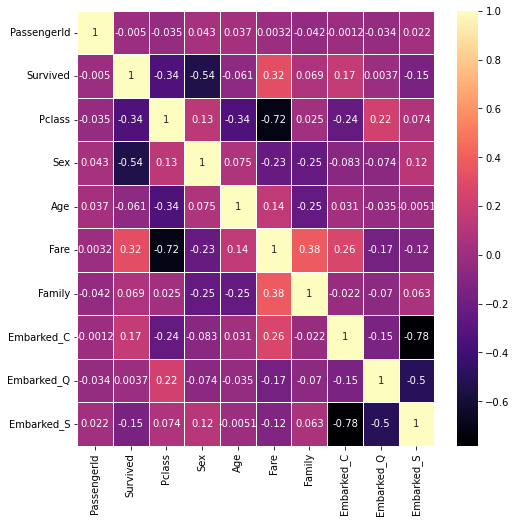

In [46]:
plt.figure(figsize=(8,8))
sns.heatmap(data=data.corr(), annot=True, linewidths=.5, cmap="magma")
plt.show()

In [47]:
y=data['Survived']
x=data.drop('Survived',axis=1)

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

# NAIVE_BAYES CLASSIFIER

In [50]:
from sklearn.naive_bayes import GaussianNB

In [51]:
GNB=GaussianNB()
model=GNB.fit(x_train,y_train)
predict=model.predict(x_test)
print('The accuracy of the NaiveBayes is',accuracy_score(predict,y_test))

The accuracy of the NaiveBayes is 0.770949720670391


In [52]:
print("Confusion Matrix \n" ,confusion_matrix(predict,y_test))

Confusion Matrix 
 [[80 16]
 [25 58]]


##### HYPERTUNING

In [54]:
from sklearn.model_selection import RepeatedStratifiedKFold

In [55]:
cv_method = RepeatedStratifiedKFold(n_splits=5,  n_repeats=3, random_state=999)

In [56]:

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=model, param_grid=params_NB, cv=cv_method,verbose=1,scoring='accuracy')
Data_transformed = PowerTransformer().fit_transform(x_test)
gs_NB.fit(Data_transformed, y_test);

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


In [57]:
results_NB = pd.DataFrame(gs_NB.cv_results_['params'])

In [58]:
results_NB['test_score'] = gs_NB.cv_results_['mean_test_score']

In [59]:
# predict the target on the test dataset
predict_test = gs_NB.predict(Data_transformed)
# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

accuracy_score on test dataset :  0.7877094972067039
